In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('../../Consolidated_Data/JLDC/JLDC_power_data2024.csv')

In [6]:
df=df.set_index(df.columns[0],drop=True)

In [8]:
df.index=pd.to_datetime(df.index)

In [11]:
power=df.copy()

# contributors month on month

In [12]:
import pandas as pd
import numpy as np
from collections import deque
 
# Define buffer size
BUFFER_SIZE = 5
 
# Initialize buffers
buffer_EAF_2 = deque(maxlen=BUFFER_SIZE)
buffer_EAF_3 = deque(maxlen=BUFFER_SIZE)
 
def get_stage(gradient, second_order_gradient, power):
    if power <= 0:
        return 'Preparation Time'
    elif 0 < power <= 1 and gradient > 0:  # Add a condition for 'starting' when power is small but increasing
        return 'Ramping-Up'
    elif gradient > 5 and second_order_gradient > 0 and power < 70:
        return 'Ramping-Up'
    elif -5 < gradient < 5 and second_order_gradient == 0 and 58 < power < 70:
        return 'Melting'
    elif gradient < -5 and second_order_gradient < 0 and power > 0:
        return 'Ramping-Down'
    else:
        return 'Melting'
 
 
def get_status(power_EAF_2, power_EAF_3):
    # add new power values to the buffers
    buffer_EAF_2.append(power_EAF_2)
    buffer_EAF_3.append(power_EAF_3)
    # if buffers don't have enough values, return 'shutdown'
    if len(buffer_EAF_2) < 2 or len(buffer_EAF_3) < 2:
        return 'Preparation Time', 'Preparation Time'
    # calculate gradients and second order gradients
    gradient_EAF_2 = np.gradient(list(buffer_EAF_2))
    gradient_EAF_3 = np.gradient(list(buffer_EAF_3))
 
    gradient_EAF_2_smooth = np.mean(gradient_EAF_2)
    gradient_EAF_3_smooth = np.mean(gradient_EAF_3)
 
    second_order_gradient_EAF_2 = np.gradient(gradient_EAF_2)
    second_order_gradient_EAF_3 = np.gradient(gradient_EAF_3)
 
    second_order_gradient_EAF_2_smooth = np.mean(second_order_gradient_EAF_2)
    second_order_gradient_EAF_3_smooth = np.mean(second_order_gradient_EAF_3)
 
    # determine the status based on the gradients
    return get_stage(gradient_EAF_2_smooth, second_order_gradient_EAF_2_smooth, power_EAF_2), get_stage(gradient_EAF_3_smooth, second_order_gradient_EAF_3_smooth, power_EAF_3)
 
 
status_EAF_2 = []
status_EAF_3 = []
 
for index, row in df.iterrows():
    power_EAF_2 = row['EAF-2']
    power_EAF_3 = row['EAF-3']
 
    # Get the status of each EAF
    status_2, status_3 = get_status(power_EAF_2, power_EAF_3)
 
    # Append the status to the list
    status_EAF_2.append(status_2)
    status_EAF_3.append(status_3)
 
# Add the status columns to the dataframe
df['EAF-2 status'] = status_EAF_2
df['EAF-3 status'] = status_EAF_3

In [13]:
df['EAFs']=df['EAF-2']+df['EAF-3']

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


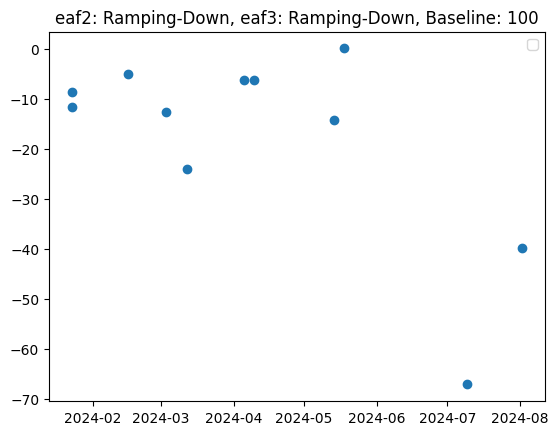

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


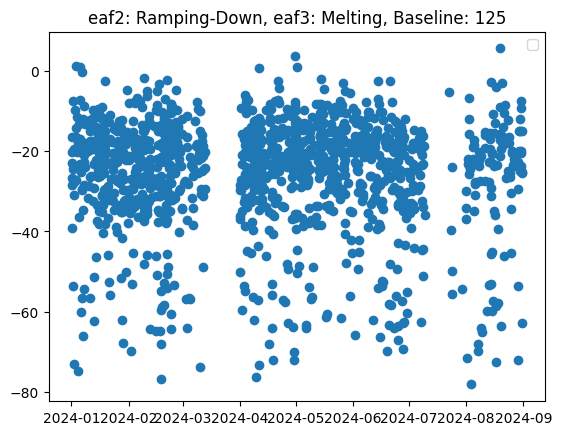

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


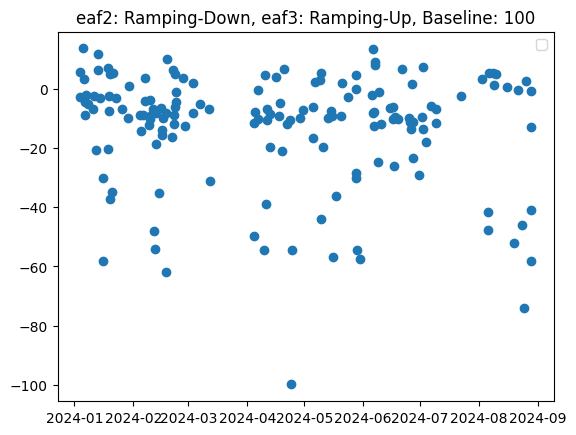

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


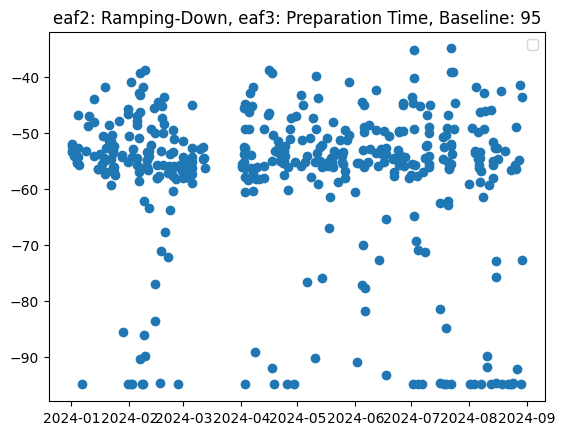

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


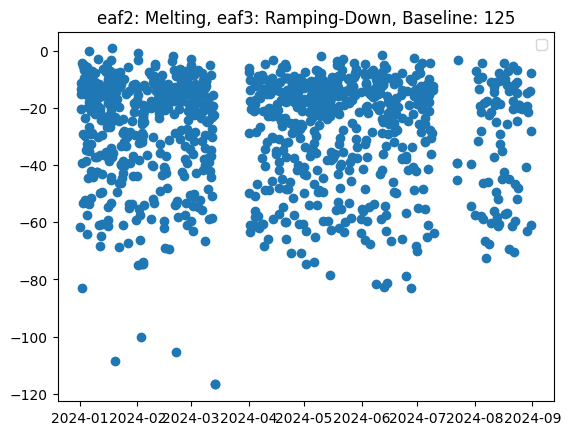

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


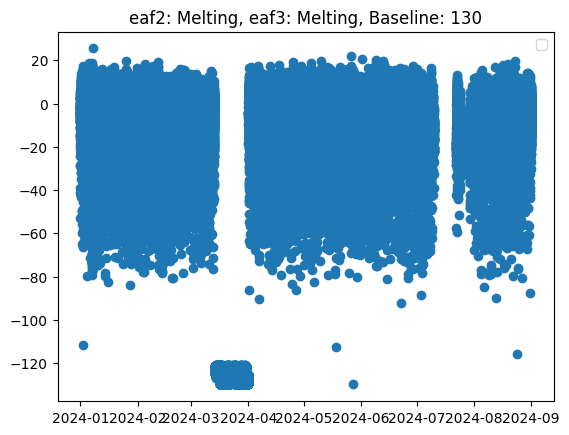

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


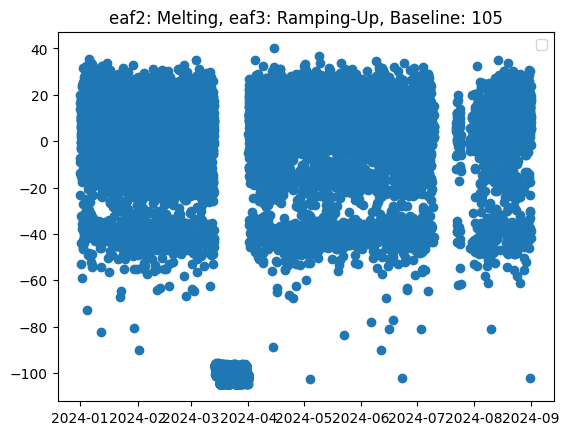

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


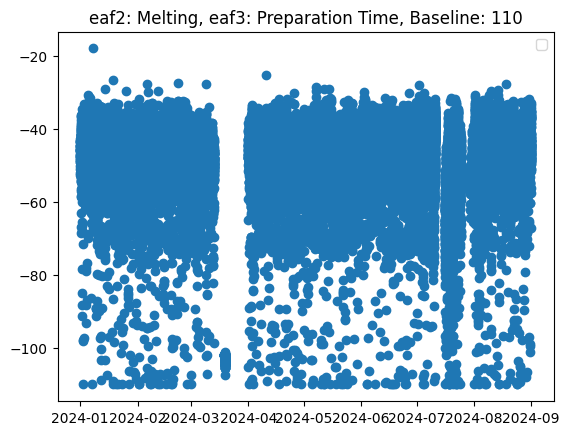

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


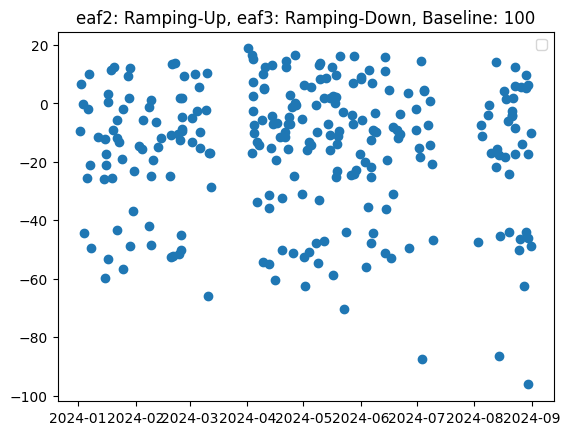

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


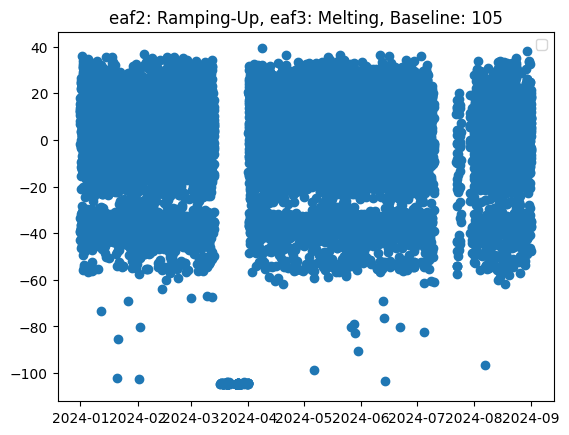

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


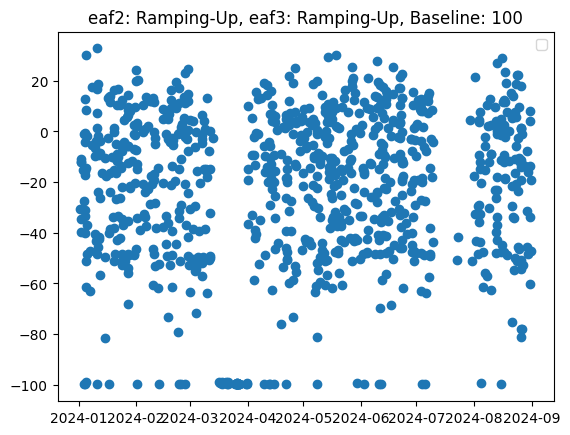

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


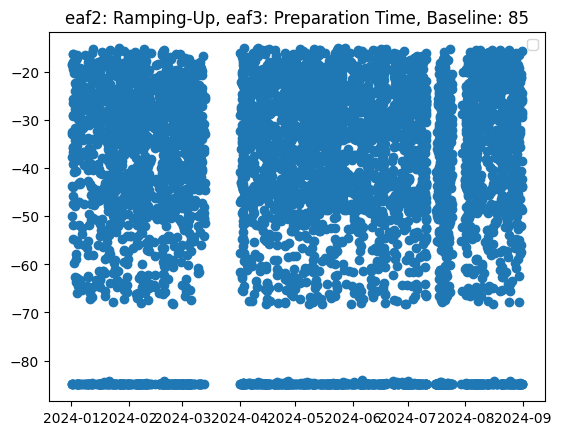

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


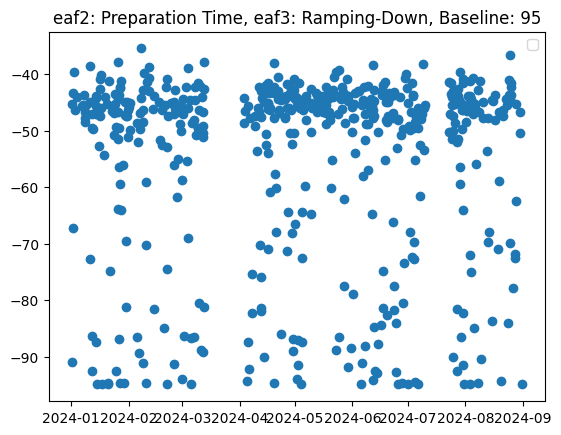

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


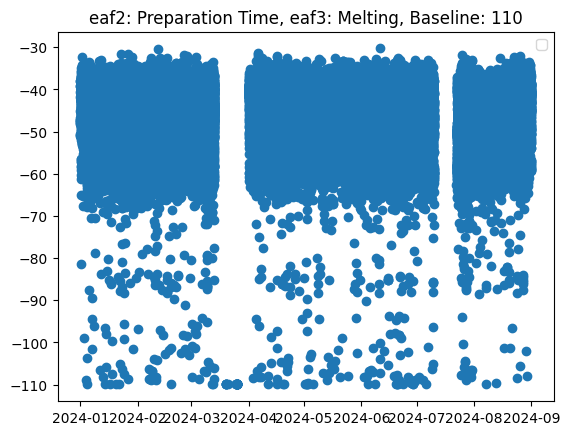

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


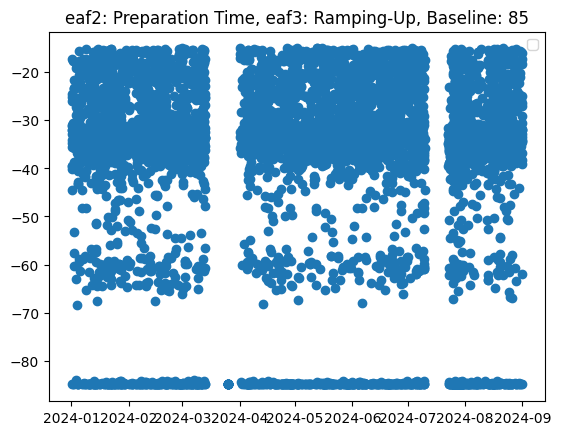

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_22280\2197840530.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


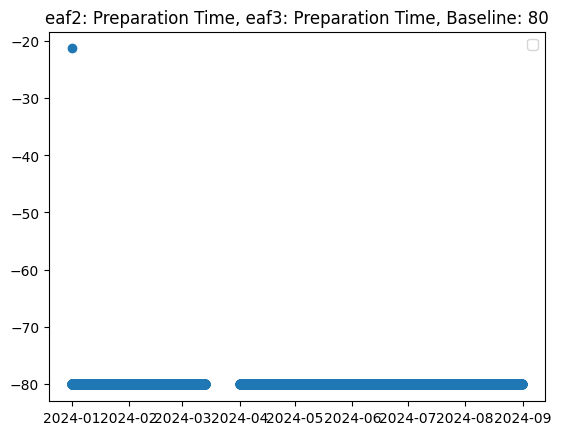

In [14]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
 
eaf_2_status_values = set(df['EAF-2 status'])
eaf_3_status_values = set(df['EAF-3 status'])
 
def plots(temp, i, j):
    plt.scatter(df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)].index, (df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - temp))
    plt.title(f"eaf2: {i}, eaf3: {j}, Baseline: {temp}")
    plt.legend()
    plt.show()
 
for i, j in itertools.product(eaf_2_status_values, eaf_3_status_values):
    if i == 'Melting' and j == 'Melting':
        plots(130, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 130
    elif i == 'Melting' and j == 'Ramping-Down':
        plots(70 + 55, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 125
    elif i == 'Ramping-Down' and j == 'Melting':
        plots(70 + 55, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 125
    elif j == 'Melting' and i == 'Ramping-Up':
        plots(60 + 45, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 105
    elif j == 'Ramping-Up' and i == 'Melting':
        plots(60 + 45, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 105
    elif j == 'Preparation Time' and i == 'Melting':
        plots(70 + 40, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 110
    elif i == 'Preparation Time' and j == 'Melting':
        plots(70 + 40, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 110
    elif i == 'Preparation Time' and j == 'Preparation Time':
        plots(80, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] -  80
    elif i == 'Preparation Time' and j == 'Ramping-Down':
        plots(95, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 95
    elif j == 'Preparation Time' and i == 'Ramping-Down':
        plots(95, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 95
    elif i == 'Preparation Time' and j == 'Ramping-Up':
        plots(85, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 85
    elif j == 'Preparation Time' and i == 'Ramping-Up':
        plots(85, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 85
    else:
        plots(100, i, j)
        df.loc[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j), 'Eafs Delta'] = df[(df['EAF-2 status'] == i) & (df['EAF-3 status'] == j)]['EAFs'] - 100

In [15]:
df['LRFs']=df[['LRF-01', 'LRF-02', 'LRF-03', 'LRF-04', 'LRF-05']].sum(axis=1)

In [16]:

df['Mills Delta']=df['Mills-ALL']-30
df['Lrfs Delta']=df['LRFs']-30
df['Nspl delta']=(df['NSPL']*-1)-25

In [17]:
df['exp_from_delta']=df[['Eafs Delta','Mills Delta', 'Lrfs Delta', 'Nspl delta']].sum(axis=1)

In [18]:
df['diff']=df['exp_from_delta']-df['Total Exp']

In [25]:
data=(df[(df['diff']<5) & (df['diff']>-5)])

In [27]:
df

,PP1-MW,PP2-MW,PH3-MW,PP3,DCPP EXP-JSPL,NSPL,EAF-2,EAF-3,LRF-01,LRF-02,...,EAF-2 status,EAF-3 status,EAFs,Eafs Delta,LRFs,Mills Delta,Lrfs Delta,Nspl delta,exp_from_delta,diff
Time,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,29.68,26.13,28.80,51.31,151.91,-15.93,0.00,58.73,0.0,12.52,...,Preparation Time,Preparation Time,58.73,-21.27,25.95,-3.28,-4.05,-9.07,-37.67,-49.86
2024-01-01 00:01:00,29.57,25.88,28.88,51.17,150.87,-16.93,0.00,59.20,0.0,12.32,...,Preparation Time,Melting,59.20,-50.80,24.47,-8.05,-5.53,-8.07,-72.45,-76.56
2024-01-01 00:02:00,29.80,25.88,28.94,51.19,150.18,-16.43,0.00,61.88,0.0,12.84,...,Preparation Time,Melting,61.88,-48.12,26.72,-3.09,-3.28,-8.57,-63.06,-87.07
2024-01-01 00:03:00,29.96,25.72,28.73,51.16,151.91,-17.18,0.00,62.82,0.0,12.13,...,Preparation Time,Melting,62.82,-47.18,24.95,4.82,-5.05,-7.82,-55.23,-72.53
2024-01-01 00:04:00,29.96,26.01,28.77,51.22,161.93,-18.34,0.00,64.80,0.0,0.00,...,Preparation Time,Melting,64.80,-45.20,0.00,15.42,-30.00,-6.66,-66.44,-54.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31 23:55:00,34.41,63.29,19.34,48.09,202.03,-18.56,0.00,67.25,0.0,-0.02,...,Preparation Time,Melting,67.25,-42.75,14.31,3.38,-15.69,-6.44,-61.50,-20.54
2024-08-31 23:56:00,34.37,63.25,19.22,48.10,203.41,-12.68,0.00,70.98,0.0,-0.02,...,Preparation Time,Melting,70.98,-39.02,14.23,4.71,-15.77,-12.32,-62.40,-18.04
2024-08-31 23:57:00,34.42,62.79,19.20,48.26,204.79,-16.41,0.00,68.42,0.0,-0.02,...,Preparation Time,Melting,68.42,-41.58,13.11,5.18,-16.89,-8.59,-61.88,-22.29


In [26]:
data

,PP1-MW,PP2-MW,PH3-MW,PP3,DCPP EXP-JSPL,NSPL,EAF-2,EAF-3,LRF-01,LRF-02,...,EAF-2 status,EAF-3 status,EAFs,Eafs Delta,LRFs,Mills Delta,Lrfs Delta,Nspl delta,exp_from_delta,diff
Time,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:28:00,30.52,25.80,28.84,58.89,216.54,-14.69,66.72,-0.06,0.00,0.00,...,Melting,Preparation Time,66.66,-43.34,41.09,-7.81,11.09,-10.31,-50.37,2.01
2024-01-01 00:51:00,30.72,25.76,28.70,59.18,215.85,-25.14,51.63,67.02,0.00,0.00,...,Ramping-Up,Melting,118.65,13.65,39.69,-6.60,9.69,0.14,16.88,1.08
2024-01-01 00:53:00,30.41,25.76,28.73,59.19,223.11,-23.40,55.44,62.58,0.00,0.00,...,Ramping-Up,Melting,118.02,13.02,24.62,4.01,-5.38,-1.60,10.05,4.58
2024-01-01 01:05:00,29.25,26.01,28.74,60.23,235.55,-15.77,58.24,62.93,0.00,11.87,...,Melting,Melting,121.17,-8.83,24.86,6.44,-5.14,-9.23,-16.76,-0.58
2024-01-01 01:06:00,29.23,25.88,28.83,60.40,233.82,-16.93,61.04,61.53,0.00,11.46,...,Melting,Melting,122.57,-7.43,38.03,-1.59,8.03,-8.07,-9.06,-4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31 23:21:00,30.81,68.39,19.27,50.20,224.84,-21.81,55.99,58.62,0.00,10.44,...,Ramping-Up,Melting,114.61,9.61,23.90,9.48,-6.10,-3.19,9.80,4.51
2024-08-31 23:34:00,33.52,67.73,19.22,49.36,208.94,-25.33,71.46,-0.06,11.13,12.64,...,Melting,Preparation Time,71.40,-38.60,37.58,1.27,7.58,0.33,-29.42,-4.85
2024-08-31 23:44:00,35.54,63.71,19.34,48.22,215.51,-22.15,66.80,-0.06,11.23,-0.02,...,Melting,Preparation Time,66.74,-43.26,26.39,3.75,-3.61,-2.85,-45.97,-1.53
